## Types of errors

![errors_1.png](pics/errors_1.png)

![errors_1.png](pics/underfitting_1.png)

![errors_1.png](pics/underfitting_2.png)

![errors_1.png](pics/overfitting_1.png)

![errors_1.png](pics/overfitting_2.png)

![overall_errors.png](pics/overall_errors.png)

## Model complexity graph

![model_tuning_1.png](pics/model_tuning_1.png)

![different_model_errors](pics/different_model_errors.png)

## Cross validation

![model_graph_2.png](pics/model_graph_2.png)

But wait! You are using the test set for the training process, you are breaking the golden rule! How can you deal with that? 

This is where cross validation comes to rescue. 
![cv_error_1.png](pics/cv_error_1.png)

![cv_error_1.png](pics/cv_error_2.png)

![cv_error_1.png](pics/cv_error_3.png)

## F-fold CV

![cv_sklearn.png](pics/cv_k_fold_2.png)
It is always good to randomize the validation set so you can set the `shuffle` flag to `True`
![cv_sklearn.png](pics/cv_sklearn.png)



## Learning Curves


![learning_curves.png](pics/learning_curves.png)

## Detect Overfitting and Underfitting with Learning Curves

For this quiz, we'll be using three models to train the circular dataset below.

* A Decision Tree model,
* a Logistic Regression model, and
* a Support Vector Machine model.

![circle-data.png](pics/circle-data.png)

One of the models overfits, one underfits, and the other one is just right. First, we'll write some code to draw the learning curves for each model, and finally we'll look at the learning curves to decide which model is which.

First, let's remember that the way the curves look for the three models, is as follows:

![learning-curves.png](pics/learning-curves.png)

For the first part of the quiz, all you need is to uncomment one of the classifiers, and hit 'Test Run' to see the graph of the Learning Curve. But if you like coding, here are some details. We'll be using the function called `learning_curve`:

`train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))`

No need to worry about all the parameters of this function, but here we'll explain the main ones:

* `estimator`, is the actual classifier we're using for the data, e.g., LogisticRegression() or GradientBoostingClassifier().
* `X` and `y` is our data, split into features and labels.
* `train_sizes` are the sizes of the chunks of data used to draw each point in the curve.
* `train_scores` are the training scores for the algorithm trained on each chunk of data.
* `test_scores` are the testing scores for the algorithm trained on each chunk of data.

Two very important observations:

* The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.
* **Very important**: As you can see, we defined our curves with Training and Testing **Error**, and this function defines them with Training and Testing **Score**. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above.


### Part 1: Drawing the learning curves
In here, we'll be comparing three models:

* A **Logistic Regression** model.
* A **Decision Tree** model.
* A **Support Vector Machine** model with an rbf kernel, and a gamma parameter of 1000 (this is another type of model, don't worry about how it works for now).

![learning-curves (1).png](pics/learning-curves(1).png)

We can observe from the curves that:

* The **Logistic Regression** model has a low training and testing score.
* The **Decision Tree** model has a high training and testing score.
* The **Support Vector Machine** model has a high training score, and a low testing score.

From here, we can determine that the Logistic Regression model underfits, the SVM model overfits, and the Decision Tree model is just right.

Equivalently, we can flip this curves (as they measure score, and our original curves measure error), and compare them with the following three curves, we can see that they look a lot like the three curves we saw before. (Note: The fact that we flip the curves doesn't mean that the error is 1 minus the score. It only means that as the model gets better, the error decreases, and the score increases.)

![learning-curves (1).png](pics/learning-curves(2).png)

Now, we should check if this is visible in the actual model. When we plot the boundary curves for each one of these models, we get the following:
![models.png](pics/models.png)


When we look at the models above, does it make sense that the first one underfits, the second one is right, and the third one overfits? It does, right? We can see that the data is correctly bounded by a circle, or a square. What our models do, is the following:

* The **Logistic Regression** model uses a line, which is too simplistic. It doesn't do very well on the training set. Thus, it underfits.
* The **Decision Tree** model uses a square, which is a pretty good fit, and generalizes well. Thus, this model is good.
* The **Support Vector Machine** model actually draws a tiny circle around each point. This is clearly just memorizing the training set, and won't generalize well. Thus, it overfits.

It's always good to do a reality check when we can, and see that our models actually do have the behavior that the metrics tell us.


## Grid search

![grid_search_1.png](pics/grid_search_1.png)

## Grid Search in sklearn

Grid Search in sklearn is very simple. We'll illustrate it with an example. Let's say we'd like to train a support vector machine, and we'd like to decide between the following parameters:

kernel: `poly` or `rbf`.
C: `0.1`, `1`, or `10`.

The steps are the following:

**1. Import GridSearchCV**

`from sklearn.model_selection import GridSearchCV`

**2. Select the parameters:**

Here we pick what are the parameters we want to choose from, and form a dictionary. In this dictionary, the keys will be the names of the parameters, and the values will be the lists of possible values for each parameter.

`parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}`

**3. Create a scorer.**
We need to decide what metric we'll use to score each of the candidate models. In here, we'll use **F1 Score**.

```
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score)
```

**4. Create a GridSearch Object with the parameters, and the scorer. Use this object to fit the data.**

```
# Create the object.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X, y)
```

**5. Get the best estimator.**

`best_clf = grid_fit.best_estimator_`

Now you can use this estimator `best_clf` to make the predictions.



## Improving a model with Grid Search

In this mini-lab, we'll fit a decision tree model to some sample data. This initial model will overfit heavily. Then we'll use Grid Search to find better parameters for this model, to reduce the overfitting.

First, some imports.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Reading and plotting the data
Now, a function that will help us read the csv file, and plot the data.

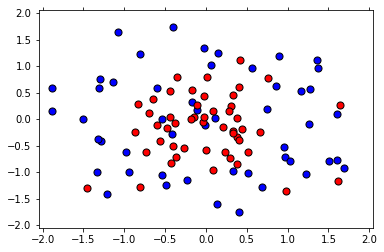

In [6]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('data/data_grid_search.csv')
plt.show()

### 2. Splitting our data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Fitting a Decision Tree model

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

Now let's plot the model, and find the testing **f1_score**, to see how we did.

The following function will help us plot the model.

In [9]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

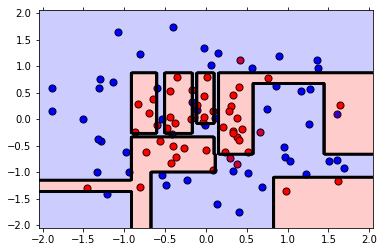

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


In [10]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Woah! Some heavy overfitting there. Not just from looking at the graph, but also from looking at the difference between the high training score (1.0) and the low testing score (0.7).Let's see if we can find better hyperparameters for this model to do better. We'll use grid search for this.

### 4. Use grid search to improve this model.

In here, we'll do the following steps:
1. First define some parameters to perform grid search on. We suggest to play with `max_depth`, `min_samples_leaf`, and `min_samples_split`.
2. Make a scorer for the model using `f1_score`.
3. Perform grid search on the classifier, using the parameters and the scorer.
4. Fit the data to the new classifier.
5. Plot the model and find the f1_score.
6. If the model is not much better, try changing the ranges for the parameters and fit it again.

**_Hint:_ If you're stuck and would like to see a working solution, check the solutions notebook in this same folder.**

The training F1 Score is 0.8148148148148148
The testing F1 Score is 0.8


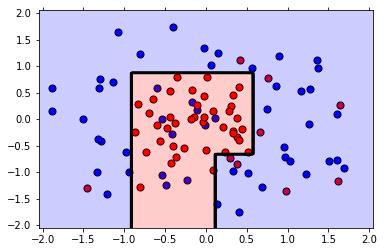

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [11]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10],
              'min_samples_split':[2,4,6,8,10]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Plot the new model.
plot_model(X, y, best_clf)

# Let's also explore what parameters ended up being used in the new model.
best_clf

### 5. Conclusion
Note that by using GridSearch we improved the F1 Score from 0.7 to 0.8 (and we lost some training score, but this is ok). Also, if you look at the plot, the second model has a much simpler boundary, which implies that it's less likely to overfit.

## Diabetes Case Study

You now have had the opportunity to work with a range of supervised machine learning techniques for both classification and regression.  Before you apply these in the project, let's do one more example to see how the machine learning process works from beginning to end with another popular dataset.

We will start out by reading in the dataset and our necessary libraries.  You will then gain an understanding of how to optimize a number of models using grid searching as you work through the notebook. 



In [14]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

# Read in our dataset
diabetes = pd.read_csv('data/diabetes.csv')

# Take a look at the first few rows of the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Because this course has been aimed at understanding machine learning techniques, we have largely ignored items related to parts of the data analysis process that come before building machine learning models - exploratory data analysis, feature engineering, data cleaning, and data wrangling.  

> **Step 1:** Let's do a few steps here.  Take a look at some of usual summary statistics calculated to accurately match the values to the appropriate key in the dictionary below. 

In [15]:
# Cells for work
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


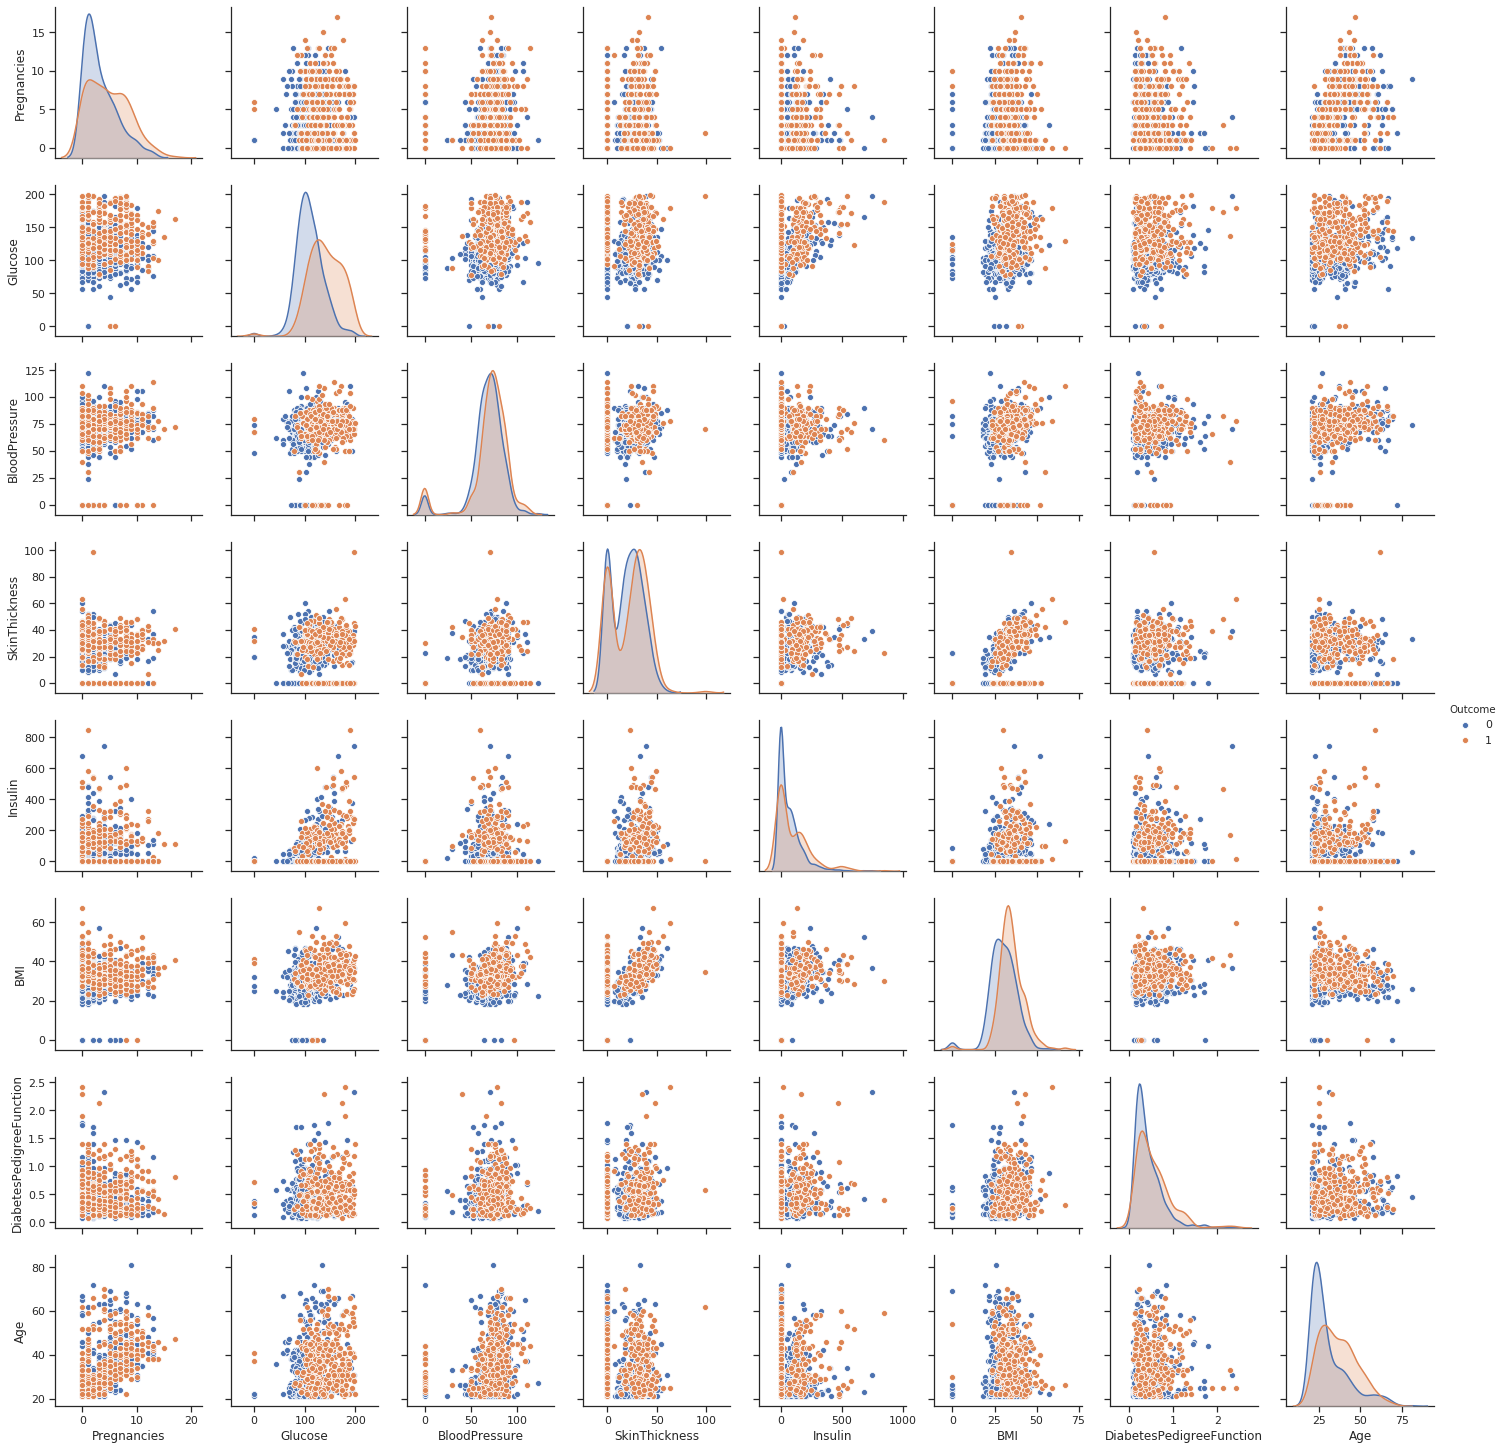

In [16]:
sns.pairplot(diabetes, hue="Outcome");

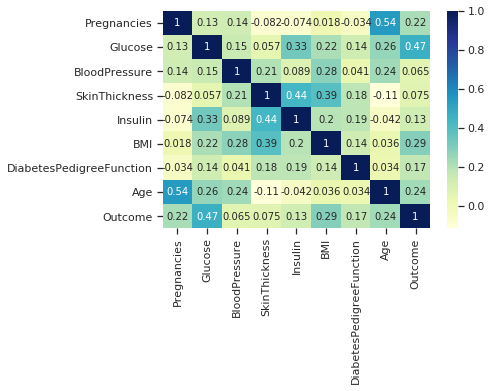

In [17]:
sns.heatmap(diabetes.corr(), annot=True, cmap="YlGnBu");

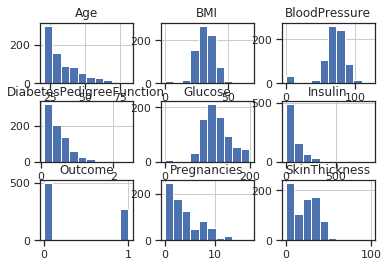

In [18]:
diabetes.hist();

In [19]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# Possible keys for the dictionary
a = '0.65'
b = '0'
c = 'Age'
d = '0.35'
e = 'Glucose'
f = '0.5'
g = "More than zero"

# Fill in the dictionary with the correct values here
answers_one = {
    'The proportion of diabetes outcomes in the dataset': d,
    'The number of missing data points in the dataset': b,
    'A dataset with a symmetric distribution': e,
    'A dataset with a right-skewed distribution': c, 
    'This variable has the strongest correlation with the outcome': e
}
answers_one

{'The proportion of diabetes outcomes in the dataset': '0.35',
 'The number of missing data points in the dataset': '0',
 'A dataset with a symmetric distribution': 'Glucose',
 'A dataset with a right-skewed distribution': 'Age',
 'This variable has the strongest correlation with the outcome': 'Glucose'}

> **Step 2**: Since our dataset here is quite clean, we will jump straight into the machine learning.  Our goal here is to be able to predict cases of diabetes.  First, you need to identify the y vector and X matrix.  Then, the following code will divide your dataset into training and test data.   

In [21]:
y = diabetes["Outcome"] # Pull y column
X = diabetes.drop("Outcome", axis = 1)# Pull X variable columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that you have a training and testing dataset, we need to create some models that and ultimately find the best of them.  However, unlike in earlier lessons, where we used the defaults, we can now tune these models to be the very best models they can be.

It can often be difficult (and extremely time consuming) to test all the possible hyperparameter combinations to find the best models.  Therefore, it is often useful to set up a randomized search.  

In practice, randomized searches across hyperparameters have shown to be more time confusing, while still optimizing quite well.  One article related to this topic is available [here](https://blog.h2o.ai/2016/06/hyperparameter-optimization-in-h2o-grid-search-random-search-and-the-future/).  The documentation for using randomized search in sklearn can be found [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In order to use the randomized search effectively, you will want to have a pretty reasonable understanding of the distributions that best give a sense of your hyperparameters.  Understanding what values are possible for your hyperparameters will allow you to write a grid search that performs well (and doesn't break).

> **Step 3**: In this step, I will show you how to use randomized search, and then you can set up grid searches for the other models in Step 4.  However, you will be helping, as I don't remember exactly what each of the hyperparameters in SVMs do.  Match each hyperparameter to its corresponding tuning functionality.



In [23]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)



> **Step 4**: Now that you have seen how to run a randomized grid search using random forest, try this out for the AdaBoost and SVC classifiers.  You might also decide to try out other classifiers that you saw earlier in the lesson to see what works best.

In [24]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

In [25]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist = {"C": [0.1, 0.5, 1, 3, 5],
              "kernel": ['linear','rbf']
             }


# Run a randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svc, param_distributions=param_dist)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)



> **Step 5**: Use the test below to see if your best model matched, what we found after running the grid search.  

In [26]:
a = 'randomforest'
b = 'adaboost'
c = 'supportvector'

best_model = b # put your best model here as a string or variable



Once you have found your best model, it is also important to understand why it is performing well.  In regression models where you can see the weights, it can be much easier to interpret results. 

> **Step 6**:  Despite the fact that your models here are more difficult to interpret, there are some ways to get an idea of which features are important.  Using the "best model" from the previous question, find the features that were most important in helping determine if an individual would have diabetes or not. Do your conclusions match what you might have expected during the exploratory phase of this notebook?

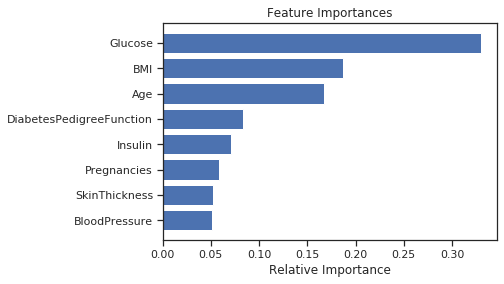

In [27]:
# Show your work here - the plot below was helpful for me
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

features = diabetes.columns[:diabetes.shape[1]]
importances = random_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

**For the most part these match what I would expect based on the correlations we saw earlier between each variable and Outcome.  However, one interesting finding is that pregnancy looked to be correlated with the Outcome in the exploratory findings.  Though, that is likely only because pregnancy is correlated with age, and age is truly the variable that is a better indicator of diabetes.**

> **Step 7**:  Using your results above to complete the dictionary below.

In [29]:
# Check your solution by matching the correct values in the dictionary
# and running this cell
a = 'Age'
b = 'BloodPressure'
c = 'BMI'
d = 'DiabetesPedigreeFunction'
e = 'Insulin'
f = 'Glucose'
g = 'Pregnancy'
h = 'SkinThickness'



sol_seven = {
    'The variable that is most related to the outcome of diabetes' : f,
    'The second most related variable to the outcome of diabetes' : c,
    'The third most related variable to the outcome of diabetes' : a,
    'The fourth most related variable to the outcome of diabetes' : d
}

